# Maurycy Oprus (s487195)

# Importy

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.inspection import permutation_importance

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor as RF

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Wczytanie danych

In [2]:
import pandas as pd

data = pd.read_csv("datasets/praca_piezometr.csv")
data

,date,watertemp,sealv,precip,temp,vwind,dwind,sin,cos,precip1,precip2,precip3,precip4,precip5,precipsum,meantemp,raise,waterlv
0,2008-09-28,12.49,479.33,0.90,13.15,7.75,255.00,-0.965926,-0.258819,0.00,0.00,0.00,0.00,0.00,0.00,11.116,False,62.59
1,2008-09-29,12.47,493.00,5.70,10.96,6.13,240.00,-0.866025,-0.500000,0.90,0.00,0.00,0.00,0.00,0.90,11.320,False,61.62
2,2008-09-30,12.44,492.00,2.40,10.29,6.13,207.50,-0.461749,-0.887011,5.70,0.90,0.00,0.00,0.00,6.60,11.340,False,61.48
3,2008-10-01,12.42,493.50,9.60,11.06,9.25,213.75,-0.555570,-0.831470,2.40,5.70,0.90,0.00,0.00,9.00,11.388,True,61.23
4,2008-10-02,12.40,497.83,0.00,10.30,11.38,220.00,-0.642788,-0.766044,9.60,2.40,5.70,0.90,0.00,18.60,11.692,True,61.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,2014-10-27,12.18,478.08,0.09,11.26,6.50,214.88,-0.571860,-0.820352,0.00,0.00,0.09,0.00,0.50,0.59,6.340,False,54.92
2125,2014-10-28,12.16,489.00,0.09,8.81,5.13,198.38,-0.315318,-0.948986,0.09,0.00,0.00,0.09,0.00,0.18,6.464,False,54.08
2126,2014-10-29,12.14,488.40,1.00,6.25,4.88,219.00,-0.629320,-0.777146,0.09,0.09,0.00,0.00,0.09,0.27,7.108,False,54.08
2127,2014-10-30,12.11,516.60,0.09,7.03,2.13,250.50,-0.942641,-0.333807,1.00,0.09,0.09,0.00,0.00,1.18,7.256,True,53.33


In [55]:
X = data.iloc[:,1:-2]
y_raise = data.iloc[:,-2]
y_waterlv = data.iloc[:,-1]
X_train,X_test,y_train_raise,y_test_raise, y_train_waterlv, y_test_waterlv = train_test_split(X, y_raise, y_waterlv, test_size=0.25, random_state=200)

In [56]:
X

,watertemp,sealv,precip,temp,vwind,dwind,sin,cos,precip1,precip2,precip3,precip4,precip5,precipsum,meantemp
0,12.49,479.33,0.90,13.15,7.75,255.00,-0.965926,-0.258819,0.00,0.00,0.00,0.00,0.00,0.00,11.116
1,12.47,493.00,5.70,10.96,6.13,240.00,-0.866025,-0.500000,0.90,0.00,0.00,0.00,0.00,0.90,11.320
2,12.44,492.00,2.40,10.29,6.13,207.50,-0.461749,-0.887011,5.70,0.90,0.00,0.00,0.00,6.60,11.340
3,12.42,493.50,9.60,11.06,9.25,213.75,-0.555570,-0.831470,2.40,5.70,0.90,0.00,0.00,9.00,11.388
4,12.40,497.83,0.00,10.30,11.38,220.00,-0.642788,-0.766044,9.60,2.40,5.70,0.90,0.00,18.60,11.692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,12.18,478.08,0.09,11.26,6.50,214.88,-0.571860,-0.820352,0.00,0.00,0.09,0.00,0.50,0.59,6.340
2125,12.16,489.00,0.09,8.81,5.13,198.38,-0.315318,-0.948986,0.09,0.00,0.00,0.09,0.00,0.18,6.464
2126,12.14,488.40,1.00,6.25,4.88,219.00,-0.629320,-0.777146,0.09,0.09,0.00,0.00,0.09,0.27,7.108
2127,12.11,516.60,0.09,7.03,2.13,250.50,-0.942641,-0.333807,1.00,0.09,0.09,0.00,0.00,1.18,7.256


In [57]:
y_raise

0       False
1       False
2       False
3        True
4        True
        ...  
2124    False
2125    False
2126    False
2127     True
2128     True
Name: raise, Length: 2129, dtype: bool

In [58]:
y_waterlv

0       62.59
1       61.62
2       61.48
3       61.23
4       61.33
        ...  
2124    54.92
2125    54.08
2126    54.08
2127    53.33
2128    54.75
Name: waterlv, Length: 2129, dtype: float64

In [88]:
# modele dla raise
raise_1 = RandomForestClassifier()
raise_2 = DecisionTreeClassifier()
raise_3 = GradientBoostingClassifier()

In [28]:
# modele dla waterlv
waterlv_1 = RandomForestRegressor()
waterlv_2 = LinearRegression()
waterlv_3 = KNeighborsRegressor()

In [38]:
# fit

In [76]:
est_1 = raise_1.fit(X_train, y_train_raise)

In [89]:
est_2 = raise_2.fit(X_train, y_train_raise)

In [78]:
est_3 = raise_3.fit(X_train, y_train_raise)

In [79]:
est_1_ = waterlv_1.fit(X_train, y_train_waterlv)

In [80]:
est_2_ = waterlv_2.fit(X_train, y_train_waterlv)

In [81]:
est_3_ = waterlv_3.fit(X_train, y_train_waterlv)

In [39]:
# predict

In [82]:
out_1 = raise_1.predict(X_test)

In [90]:
out_2 = raise_2.predict(X_test)

In [84]:
out_3 = raise_3.predict(X_test)

In [43]:
out_1_ = waterlv_1.predict(X_test)

In [45]:
out_2_ = waterlv_2.predict(X_test)

In [47]:
out_3_ = waterlv_3.predict(X_test)

In [91]:
# sprawdzanie wyników - raise
score_raise_1 = accuracy_score(y_test_raise, out_1)
score_raise_2 = accuracy_score(y_test_raise, out_2)
score_raise_3 = accuracy_score(y_test_raise, out_3)
print("Random Forest:", score_raise_1)
print("Decision Tree:", score_raise_2)
print("Gradient Boosting:", score_raise_3)

Random Forest: 0.8048780487804879
Decision Tree: 0.6960600375234521
Gradient Boosting: 0.8142589118198874


In [68]:
# sprawdzanie wyników - waterlv
score_waterlv_1 = mean_absolute_error(y_test_waterlv, out_1_)
score_waterlv_2 = mean_absolute_error(y_test_waterlv, out_2_)
score_waterlv_3 = mean_absolute_error(y_test_waterlv, out_3_)
print("Random Forest: ", score_waterlv_1)
print("Linear Regression: ", score_waterlv_2)
print("k-NN: ", score_waterlv_3)

Random Forest:  21.153583864915575
Linear Regression:  19.870122260787262
k-NN:  21.017204502814256


# Istotność zmiennych (waterlv)

In [105]:
feature_importance = pd.Series(est_1_.feature_importances_, index=vals)
print(feature_importance)

watertemp    0.213980
sealv        0.246769
precip       0.022608
temp         0.084546
vwind        0.030746
dwind        0.022696
sin          0.025958
cos          0.029978
precip1      0.021086
precip2      0.021599
precip3      0.021065
precip4      0.020239
precip5      0.020872
precipsum    0.070535
meantemp     0.147324
dtype: float64


In [100]:
trained = permutation_importance(est_2_, X_train, y_train_waterlv)
tested = permutation_importance(est_2_, X_test, y_test_waterlv)
pd.DataFrame(zip(trained['importances_mean'],tested['importances_mean']),index=X.columns,columns=["train","test"])

,train,test
watertemp,0.000170,0.001502
sealv,0.393912,0.328676
precip,0.000485,0.000622
temp,0.015280,0.019527
vwind,0.003922,0.003310
dwind,0.026867,0.016310
sin,0.038445,0.036039
cos,0.002296,0.006875
precip1,0.002335,0.005773
precip2,0.000008,0.000004


In [102]:
trained = permutation_importance(est_3_, X_train, y_train_waterlv)
tested = permutation_importance(est_3_, X_test, y_test_waterlv)
pd.DataFrame(zip(trained['importances_mean'],tested['importances_mean']),index=X.columns,columns=["train","test"])

,train,test
watertemp,-0.000931,0.003652
sealv,0.493009,0.407547
precip,0.009971,-0.001672
temp,0.092730,0.128202
vwind,-0.003158,0.003520
dwind,0.282016,0.117878
sin,0.000631,-0.000467
cos,0.000458,0.000197
precip1,0.000172,0.003974
precip2,-0.006018,0.004825


# Porównanie PDP dla różnych estymatorów

Text(0.5, 0.98, 'Random Forest')

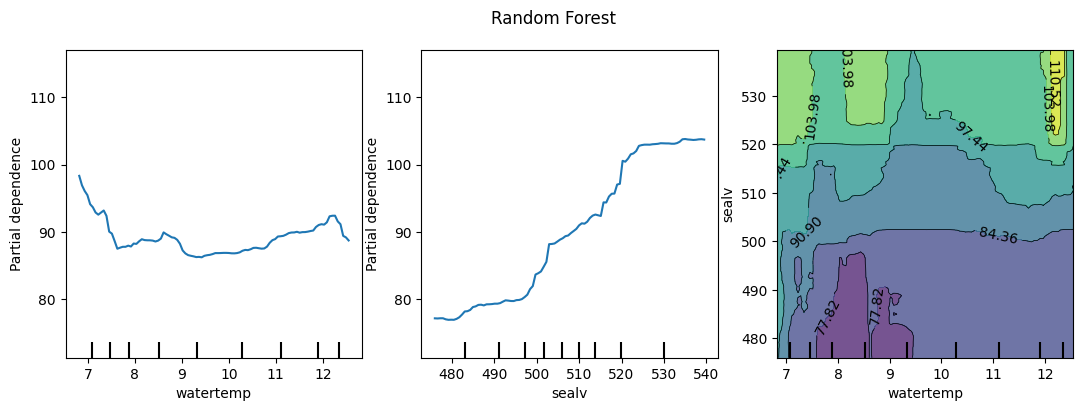

In [106]:
fig, axes = plt.subplots(ncols=3,figsize=(13,4))
PartialDependenceDisplay.from_estimator(est_1_, X, features=['watertemp', 'sealv', ('watertemp', 'sealv')],ax=axes)
fig.suptitle("Random Forest")

Text(0.5, 0.98, 'Linear Regression')

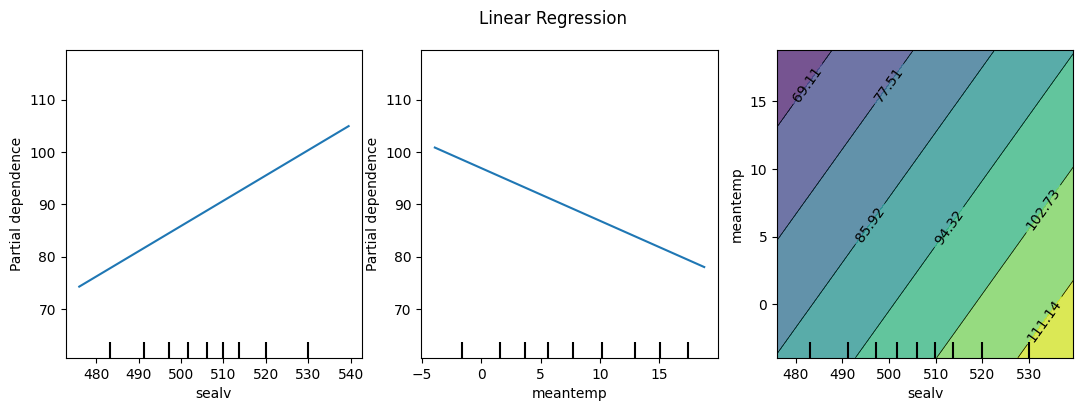

In [110]:
fig, axes = plt.subplots(ncols=3,figsize=(13,4))
PartialDependenceDisplay.from_estimator(est_2_, X, features=['sealv', 'meantemp', ('sealv', 'meantemp')],ax=axes)
fig.suptitle("Linear Regression")

Text(0.5, 0.98, 'k-NN')

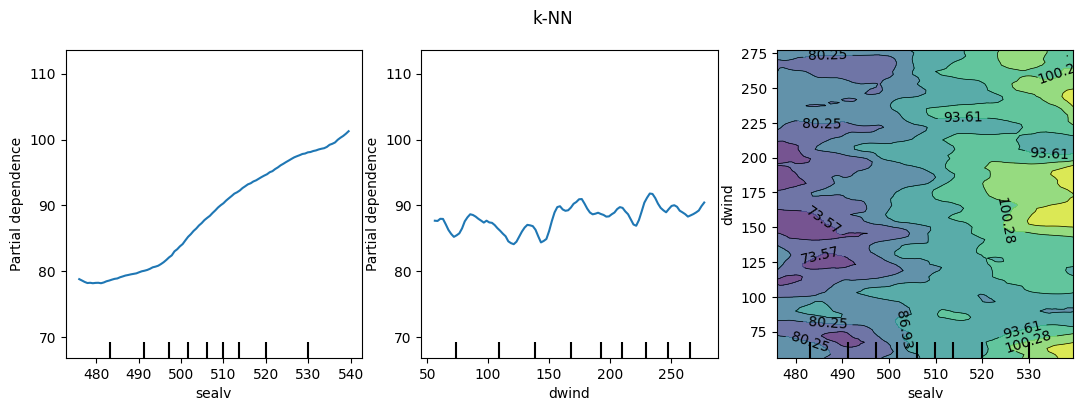

In [140]:
fig, axes = plt.subplots(ncols=3,figsize=(13,4))
PartialDependenceDisplay.from_estimator(est_3_, X, features=['sealv', 'dwind', ('sealv', 'dwind')],ax=axes)
fig.suptitle("k-NN")

# Istotność zmiennych (raise)

In [112]:
feature_importance = pd.Series(est_1.feature_importances_, index=vals)
print(feature_importance)

watertemp    0.058103
sealv        0.128051
precip       0.045867
temp         0.054507
vwind        0.085820
dwind        0.077496
sin          0.064461
cos          0.057386
precip1      0.076071
precip2      0.082805
precip3      0.042622
precip4      0.037259
precip5      0.031013
precipsum    0.097096
meantemp     0.061443
dtype: float64


In [113]:
feature_importance = pd.Series(est_2.feature_importances_, index=vals)
print(feature_importance)

watertemp    0.078627
sealv        0.130809
precip       0.037107
temp         0.059316
vwind        0.090289
dwind        0.065918
sin          0.018062
cos          0.045668
precip1      0.076533
precip2      0.057049
precip3      0.039386
precip4      0.025606
precip5      0.027626
precipsum    0.188573
meantemp     0.059430
dtype: float64


In [114]:
feature_importance = pd.Series(est_1.feature_importances_, index=vals)
print(feature_importance)

watertemp    0.058103
sealv        0.128051
precip       0.045867
temp         0.054507
vwind        0.085820
dwind        0.077496
sin          0.064461
cos          0.057386
precip1      0.076071
precip2      0.082805
precip3      0.042622
precip4      0.037259
precip5      0.031013
precipsum    0.097096
meantemp     0.061443
dtype: float64


# Porównanie PDP dla różnych estymatorów

Text(0.5, 0.98, 'Random Forest')

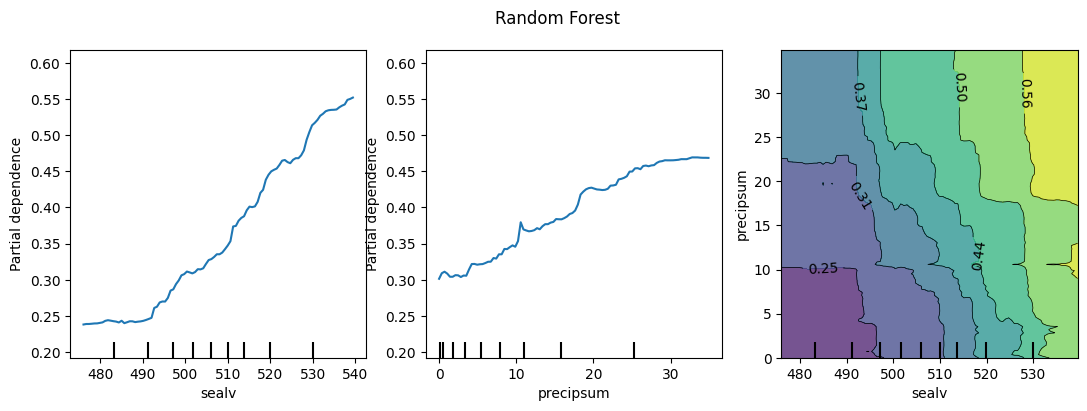

In [116]:
fig, axes = plt.subplots(ncols=3,figsize=(13,4))
PartialDependenceDisplay.from_estimator(est_1, X, features=['sealv', 'precipsum', ('sealv', 'precipsum')],ax=axes)
fig.suptitle("Random Forest")

Text(0.5, 0.98, 'Decision Tree')

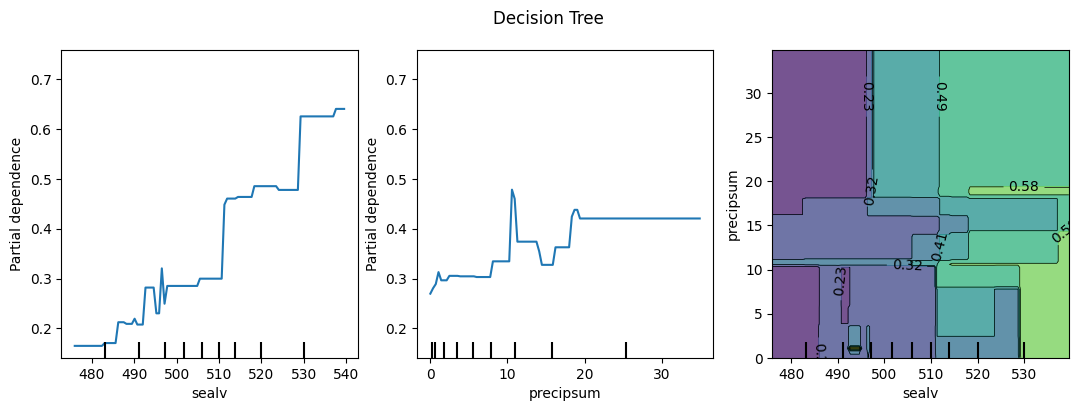

In [117]:
fig, axes = plt.subplots(ncols=3,figsize=(13,4))
PartialDependenceDisplay.from_estimator(est_2, X, features=['sealv', 'precipsum', ('sealv', 'precipsum')],ax=axes)
fig.suptitle("Decision Tree")

Text(0.5, 0.98, 'Gradient Boosting')

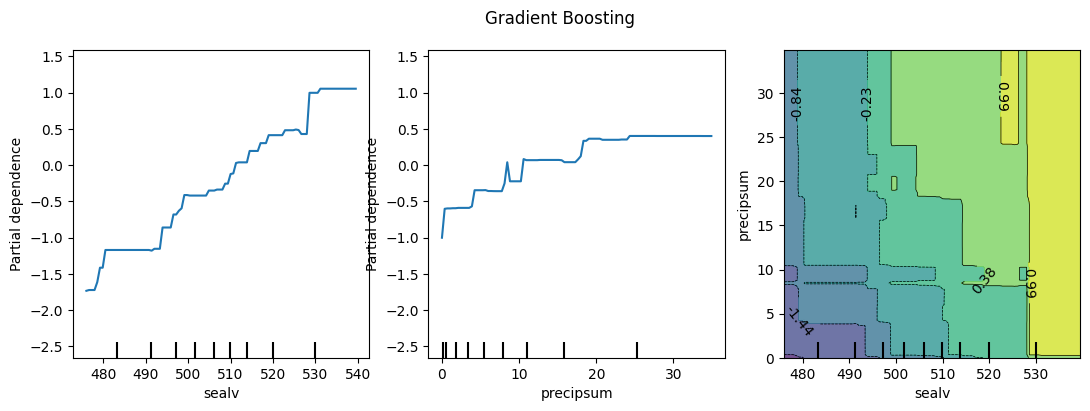

In [118]:
fig, axes = plt.subplots(ncols=3,figsize=(13,4))
PartialDependenceDisplay.from_estimator(est_3, X, features=['sealv', 'precipsum', ('sealv', 'precipsum')],ax=axes)
fig.suptitle("Gradient Boosting")

# Wszystkie PDP

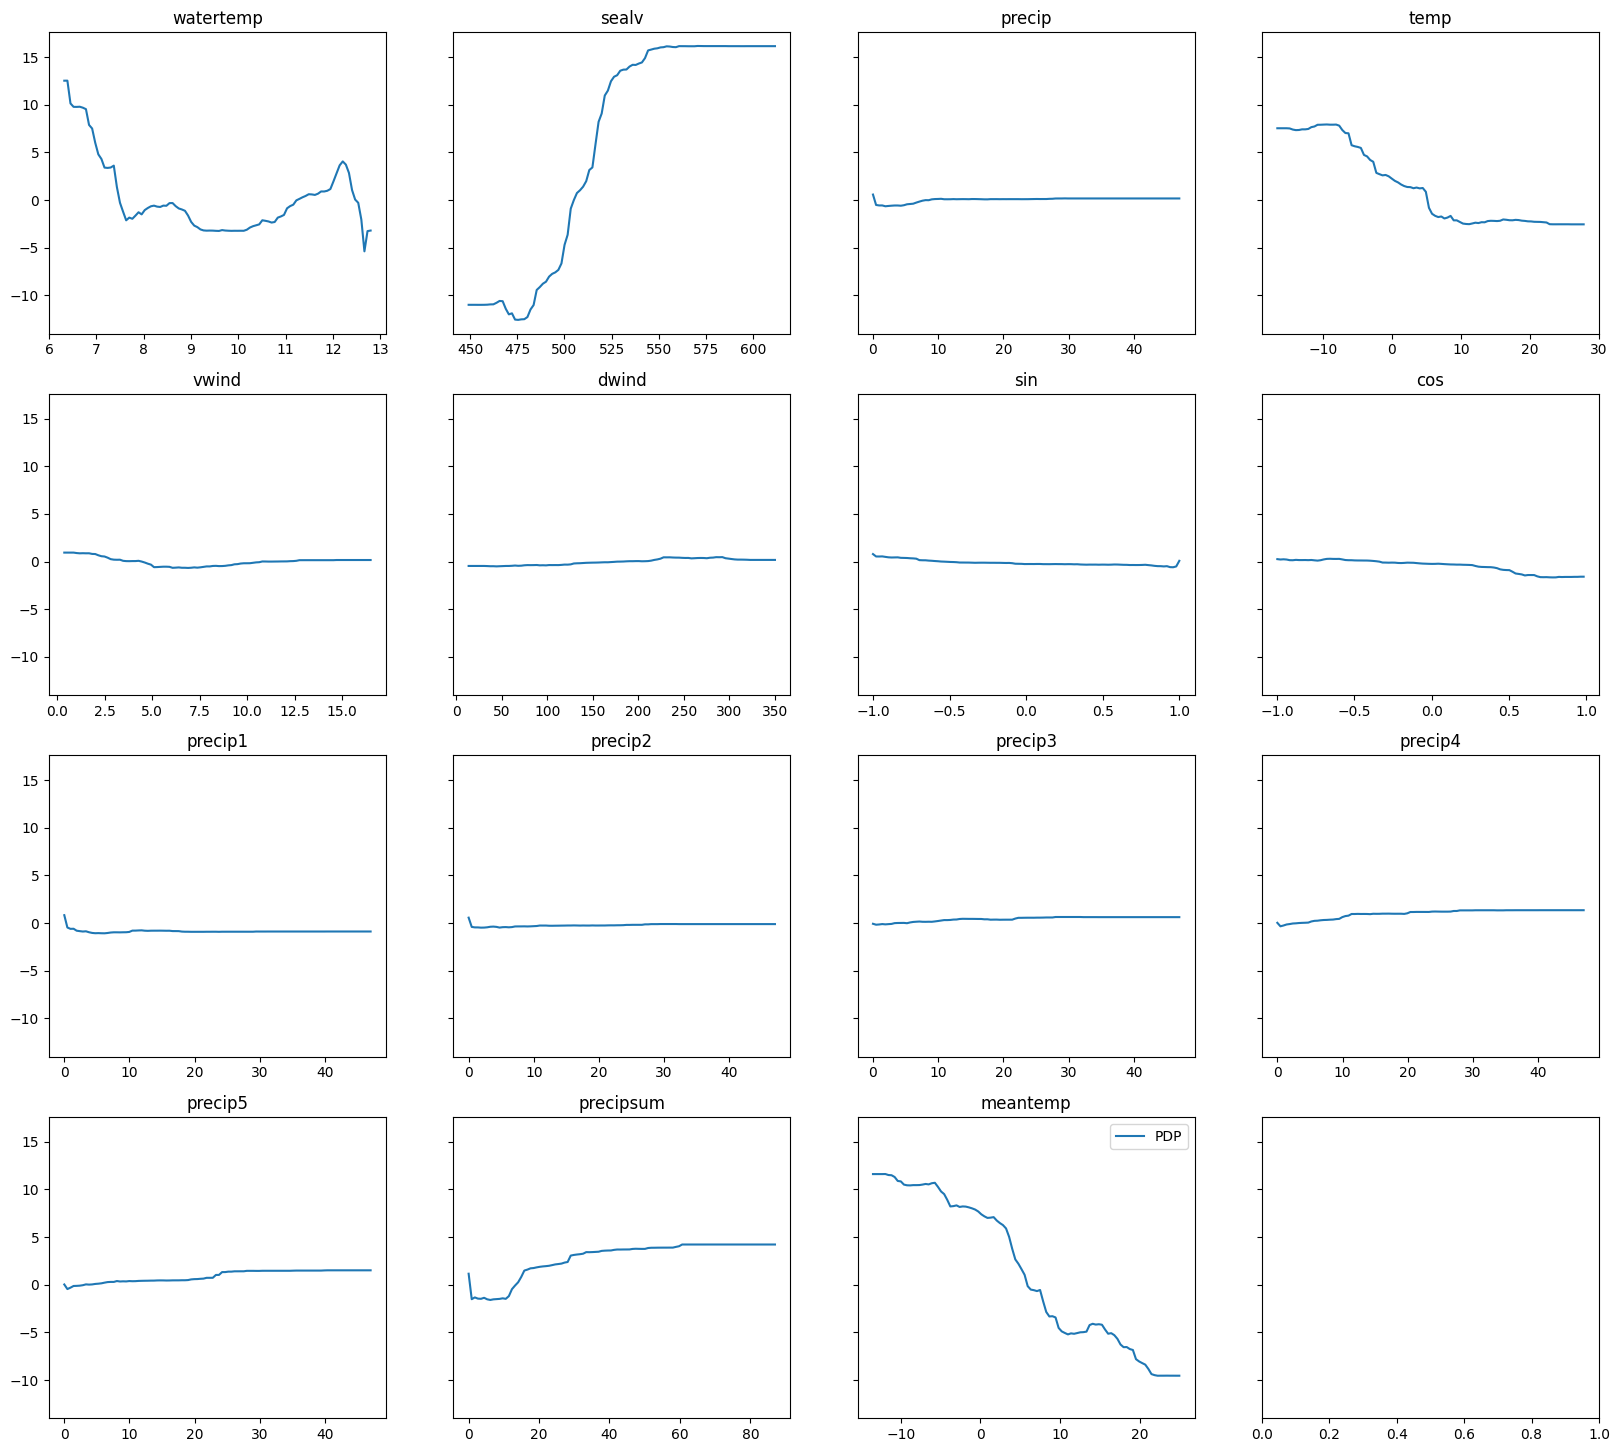

In [145]:
fig,axes = plt.subplots(ncols=4,nrows=4,figsize=(20,18),sharey=True)
fax = axes.flatten()
Xn, yn = X.to_numpy(), y_waterlv.to_numpy() 
rf_1 = RandomForestRegressor().fit(Xn, yn)
for i,feature in enumerate(X.columns):
    pdp = partial_dependence(rf_1,X,features=[feature],percentiles=(0,1)) 
    fax[i].plot(pdp['values'][0],pdp['average'][0]-y_waterlv.mean(),label='PDP')
    fax[i].set_title(feature)
_ = fax[i].legend()

# Boundary Plots

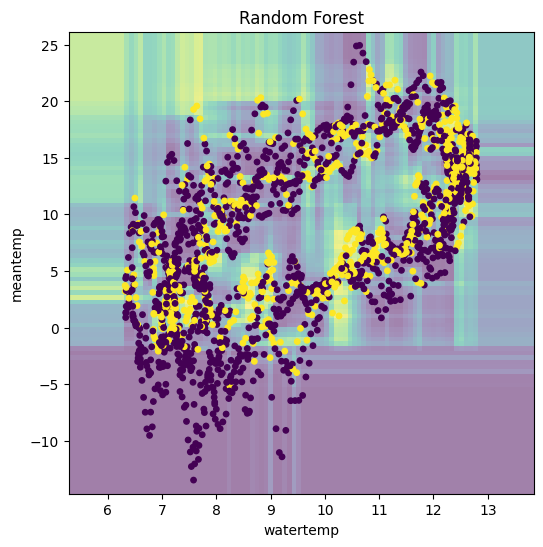

In [80]:
Xdash = X.iloc[:,[0,-1]] # pierwsza i ostatnia zmienna
regressor = RF().fit(Xdash, y_waterlv)
fig,ax = plt.subplots(figsize=(6,6)) # warto to zrobić aby sterować ryciną
disp = DecisionBoundaryDisplay.from_estimator(
    regressor, Xdash, response_method="predict",plot_method='pcolormesh',
    xlabel=Xdash.columns[0], ylabel=Xdash.columns[1],
    alpha=0.5,ax=ax
)
ax.set_title("Random Forest")

disp.ax_.scatter(Xdash.watertemp,Xdash.meantemp,c=y,s=15)

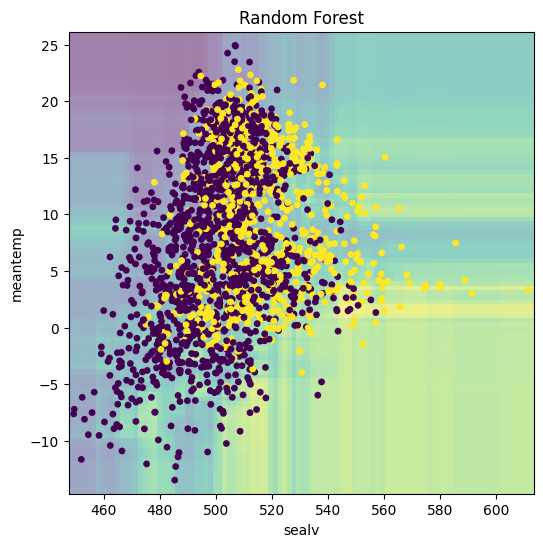

In [134]:
Xdash = X.iloc[:,[1,-1]] # pierwsza i ostatnia zmienna
regressor = RF().fit(Xdash, y_waterlv)
fig,ax = plt.subplots(figsize=(6,6)) # warto to zrobić aby sterować ryciną
disp = DecisionBoundaryDisplay.from_estimator(
    regressor, Xdash, response_method="predict",plot_method='pcolormesh',
    xlabel=Xdash.columns[0], ylabel=Xdash.columns[1],
    alpha=0.5,ax=ax
)
ax.set_title("Random Forest")

disp.ax_.scatter(Xdash.sealv,Xdash.meantemp,c=y,s=15)

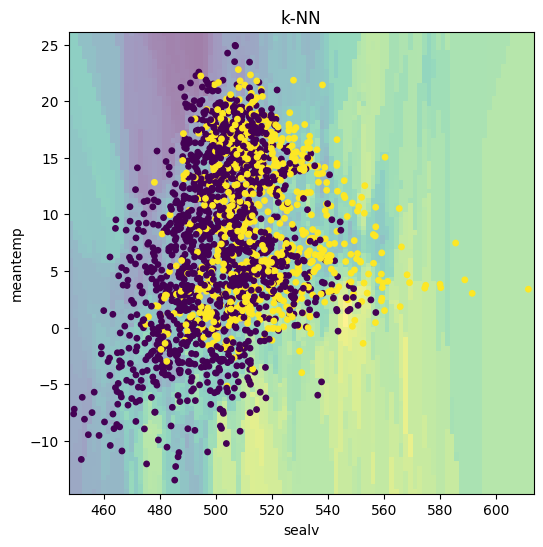

In [131]:
Xdash = X.iloc[:,[1,-1]] # druga i ostatnia zmienna
regressor = KNeighborsRegressor().fit(Xdash, y_waterlv)
fig,ax = plt.subplots(figsize=(6,6)) # warto to zrobić aby sterować ryciną
disp = DecisionBoundaryDisplay.from_estimator(
    regressor, Xdash, response_method="predict",plot_method='pcolormesh',
    xlabel=Xdash.columns[0], ylabel=Xdash.columns[1],
    alpha=0.5,ax=ax
)
ax.set_title("k-NN")

disp.ax_.scatter(Xdash.sealv,Xdash.meantemp,c=y,s=15)

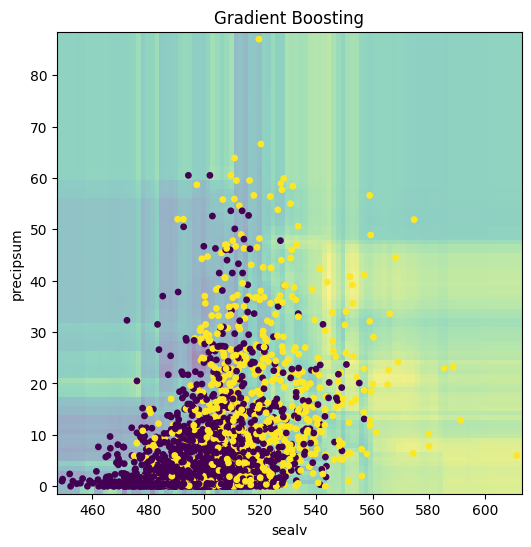

In [139]:
Xdash = X.iloc[:,[1,-2]] # pierwsza i przedostatnia zmienna
regressor = RF().fit(Xdash, y_waterlv)
fig,ax = plt.subplots(figsize=(6,6)) # warto to zrobić aby sterować ryciną
disp = DecisionBoundaryDisplay.from_estimator(
    regressor, Xdash, response_method="predict",plot_method='pcolormesh',
    xlabel=Xdash.columns[0], ylabel=Xdash.columns[1],
    alpha=0.5,ax=ax
)
ax.set_title("Gradient Boosting")

disp.ax_.scatter(Xdash.sealv,Xdash.precipsum,c=y,s=15)

# ALE plots dla wszystkich zmiennych:

In [124]:
# waterlv

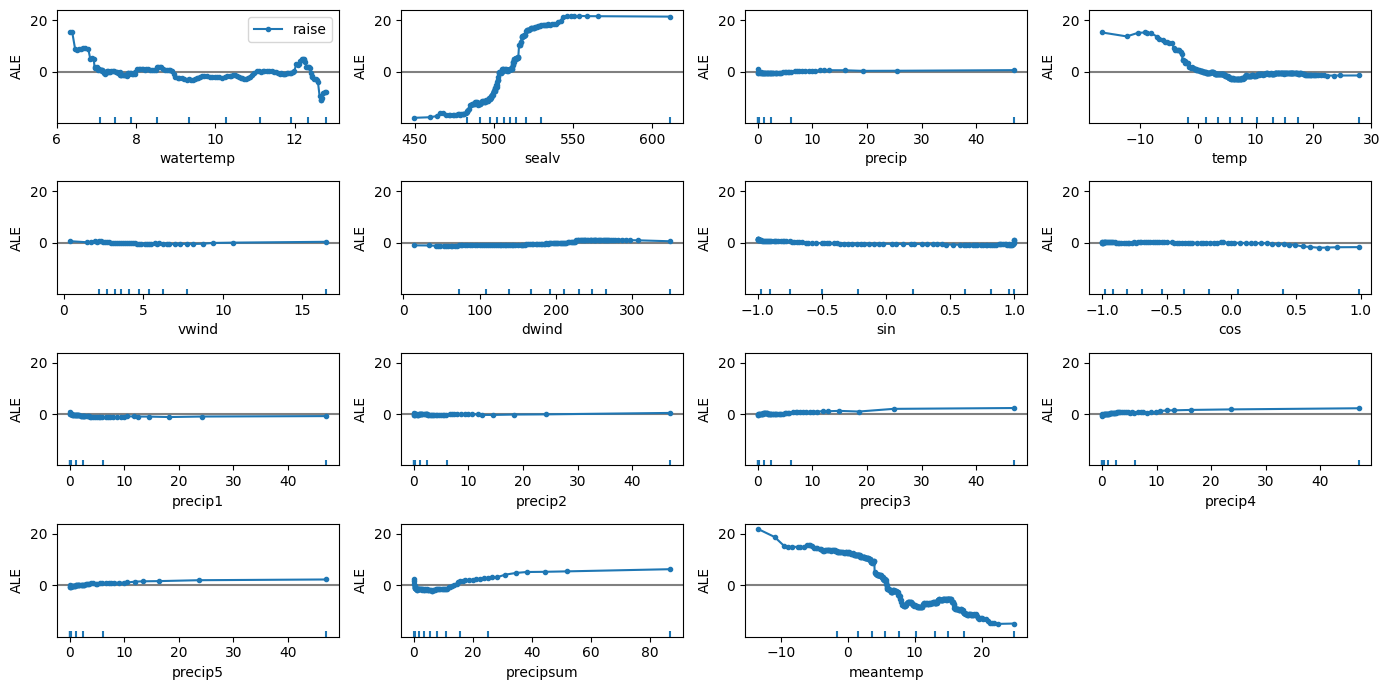

In [119]:
from alibi.explainers import ALE, plot_ale
Xn, yn = X.to_numpy(), y_waterlv.to_numpy() # w celu pozbycia się feature names.
regp_01a = RandomForestRegressor().fit(Xn, yn)
regp_01_ale = ALE(regp_01a.predict, feature_names=X.columns, target_names=[y.name])
regp_01_ale_exp = regp_01_ale.explain(Xn)
_ = plot_ale(regp_01_ale_exp, n_cols=4, fig_kw={'figwidth':14, 'figheight': 7})

In [125]:
# raise

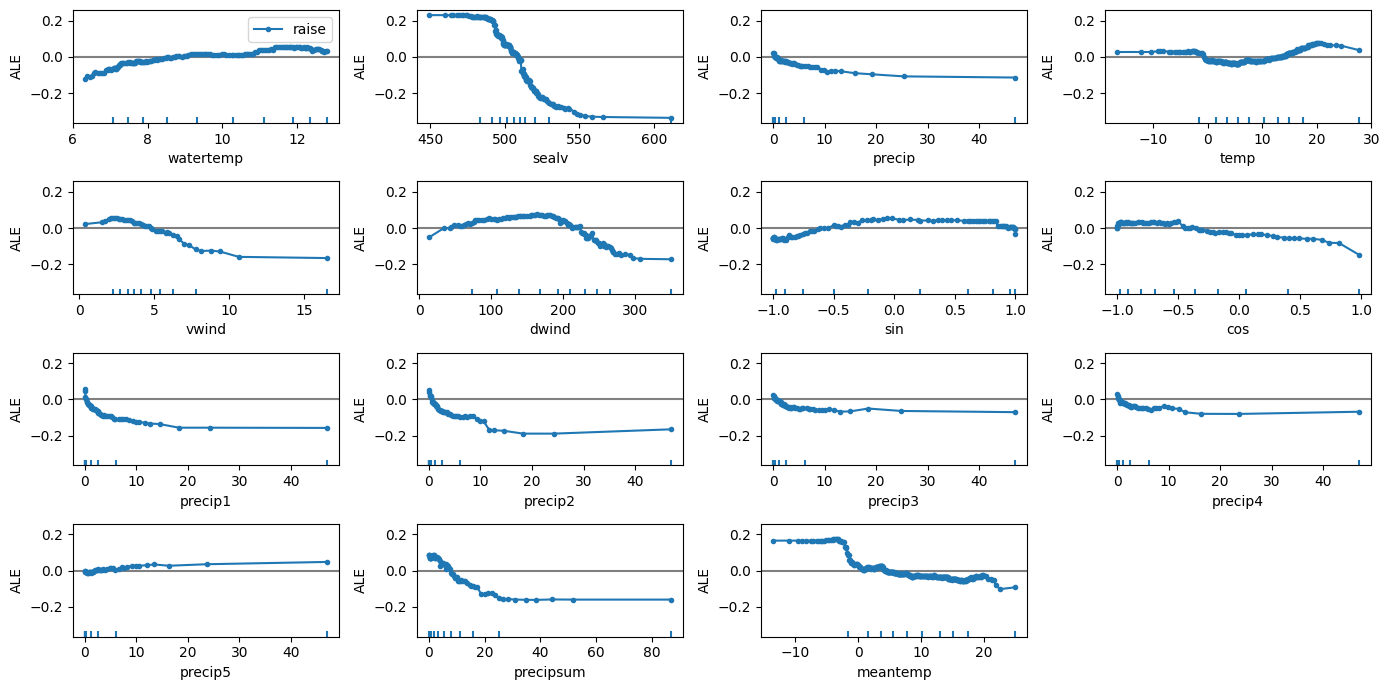

In [129]:
Xn, yn = X.to_numpy(), y_raise.to_numpy() # w celu pozbycia się feature names.
reg_02a = RandomForestClassifier().fit(Xn2, yn2)
reg_02_ale = ALE(reg_02a.predict_proba, feature_names=X.columns, target_names=[y_raise.name])
reg_02_ale_exp = reg_02_ale.explain(Xn2)
_ = plot_ale(reg_02_ale_exp, n_cols=4, fig_kw={'figwidth':14, 'figheight': 7})